# Day 6: Probably a Fire Hazard

## Part 1

Because your neighbors keep defeating you in the holiday house decorating contest year after year, you've decided to deploy one million lights in a 1000x1000 grid.

Furthermore, because you've been especially nice this year, Santa has mailed you instructions on how to display the ideal lighting configuration.

Lights in your grid are numbered from 0 to 999 in each direction; the lights at each corner are at ```0,0```, ```0,999```, ```999,999```, and ```999,0```. The instructions include whether to ```turn on```, ```turn off```, or ```toggle``` various inclusive ranges given as coordinate pairs. Each coordinate pair represents opposite corners of a rectangle, inclusive; a coordinate pair like ```0,0 through 2,2``` therefore refers to 9 lights in a 3x3 square. The lights all start turned off.

To defeat your neighbors this year, all you have to do is set up your lights by doing the instructions Santa sent you in order.

For example:

- ```turn on 0,0 through 999,999``` would turn on (or leave on) every light.
- ```toggle 0,0 through 999,0``` would toggle the first line of 1000 lights, turning off the ones that were on, and turning on the ones that were off.
- ```turn off 499,499 through 500,500``` would turn off (or leave off) the middle four lights.

After following the instructions, how many lights are lit?

In [1]:
import numpy as np
from IPython.display import Image
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

In [2]:
class light_array:
    def __init__(self):
        self.board = np.zeros((1000,1000),dtype = int)
    
    def update(self, instruction):
        operation = instruction[0]
        start = (list(map(int,instruction[1].split(','))))
        end = (list(map(int,instruction[3].split(','))))
        
        #print(operation, start, end)
        
        if operation == "turnoff":
            self.off(start, end)
            
        elif operation == "turnon":
            self.on(start, end)
            
        elif operation == "toggle":
            self.toggle (start, end)
        
        
    def off(self, start, end):
        self.board[start[0]:end[0]+1, start[1]:end[1]+1] = 0
        return self.board
    
    def on(self, start, end):
        self.board[start[0]:end[0]+1, start[1]:end[1]+1] = 1
        return self.board
        
    def toggle(self, start, end):
        self.board[start[0]:end[0]+1, start[1]:end[1]+1] = np.mod(self.board[start[0]:end[0]+1, start[1]:end[1]+1]+1,2)
        return self.board
    

In [3]:
def load_instructions(path):
    file = open(path,"r")
    lines = file.readlines()
    lines = [l.replace('\n','') for l in lines]
    lines = [l.split(' ') for l in lines]
    
    lines_formatted = []
    
    for i, l in enumerate(lines):
        
        if len(l) == 5:
            
            lines_formatted.append([l[0]+l[1], l[2], l[3] , l[4]])
            
        else:
            lines_formatted.append(l)
    
    
    return lines_formatted

In [4]:
instructions = load_instructions("day06_data.txt")

C:\Users\qnb13186\AppData\Local\Temp/ipykernel_2624/518015909.py:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='day06_data.txt' mode='r' encoding='cp1252'>
  instructions = load_instructions("day06_data.txt")


In [5]:
lights = light_array()
lights.board
lights.board[0:10,0:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [6]:
lights.on([0, 0], [6, 6])
lights.board[0:8,0:8]

array([[1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
lights.off([1, 1], [5, 5])
lights.board[0:8,0:8]

array([[1, 1, 1, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [8]:
lights.toggle([0, 0], [6, 6])
lights.board[0:8,0:8]

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

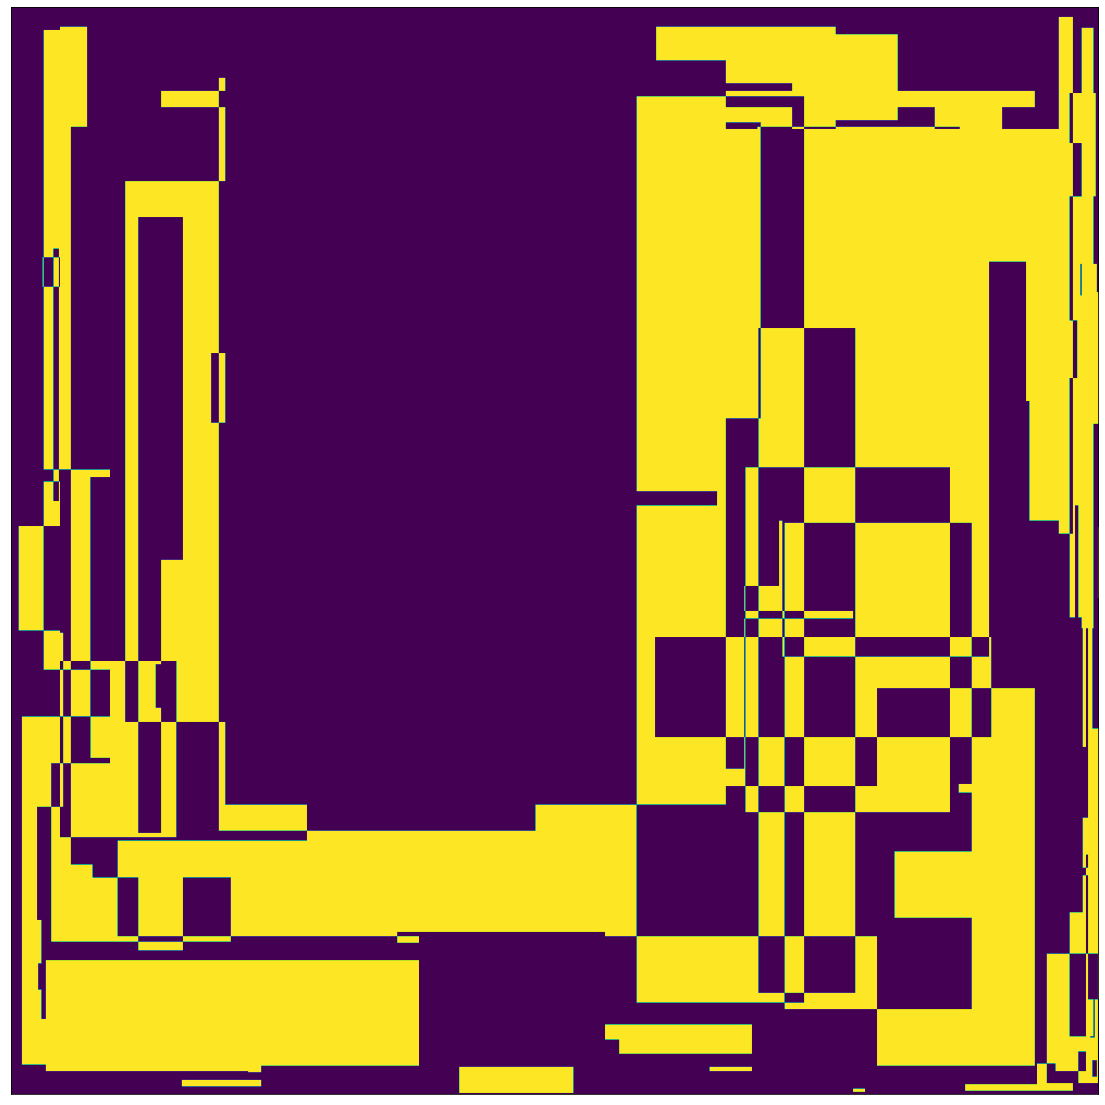

400410


In [9]:
lights = light_array()
for i in instructions:
    lights.update(i)

plt.imshow(lights.board)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()    

print(np.sum(lights.board))

## Part 2

You just finish implementing your winning light pattern when you realize you mistranslated Santa's message from Ancient Nordic Elvish.

The light grid you bought actually has individual brightness controls; each light can have a brightness of zero or more. The lights all start at zero.

The phrase ```turn on``` actually means that you should increase the brightness of those lights by ```1```.

The phrase ```turn off``` actually means that you should decrease the brightness of those lights by ```1```, to a minimum of zero.

The phrase ```toggle``` actually means that you should increase the brightness of those lights by ```2```.

What is the total brightness of all lights combined after following Santa's instructions?

For example:

- ```turn on 0,0 through 0,0``` would increase the total brightness by ```1```.
- ```toggle 0,0 through 999,999``` would increase the total brightness by ```2000000```.

In [10]:
class light_array:
    def __init__(self):
        self.board = np.zeros((1000,1000),dtype = int)
    
    def update(self, instruction):
        operation = instruction[0]
        start = (list(map(int,instruction[1].split(','))))
        end = (list(map(int,instruction[3].split(','))))
        
        #print(operation, start, end)
        
        if operation == "turnoff":
            self.off(start, end)
            
        elif operation == "turnon":
            self.on(start, end)
            
        elif operation == "toggle":
            self.toggle (start, end)
        
        
    def off(self, start, end):
        self.board[start[0]:end[0]+1, start[1]:end[1]+1] -= 1
        self.board[self.board<0] = 0
        return self.board
    
    def on(self, start, end):
        self.board[start[0]:end[0]+1, start[1]:end[1]+1] += 1
        return self.board
        
    def toggle(self, start, end):
        self.board[start[0]:end[0]+1, start[1]:end[1]+1] += 2
        return self.board

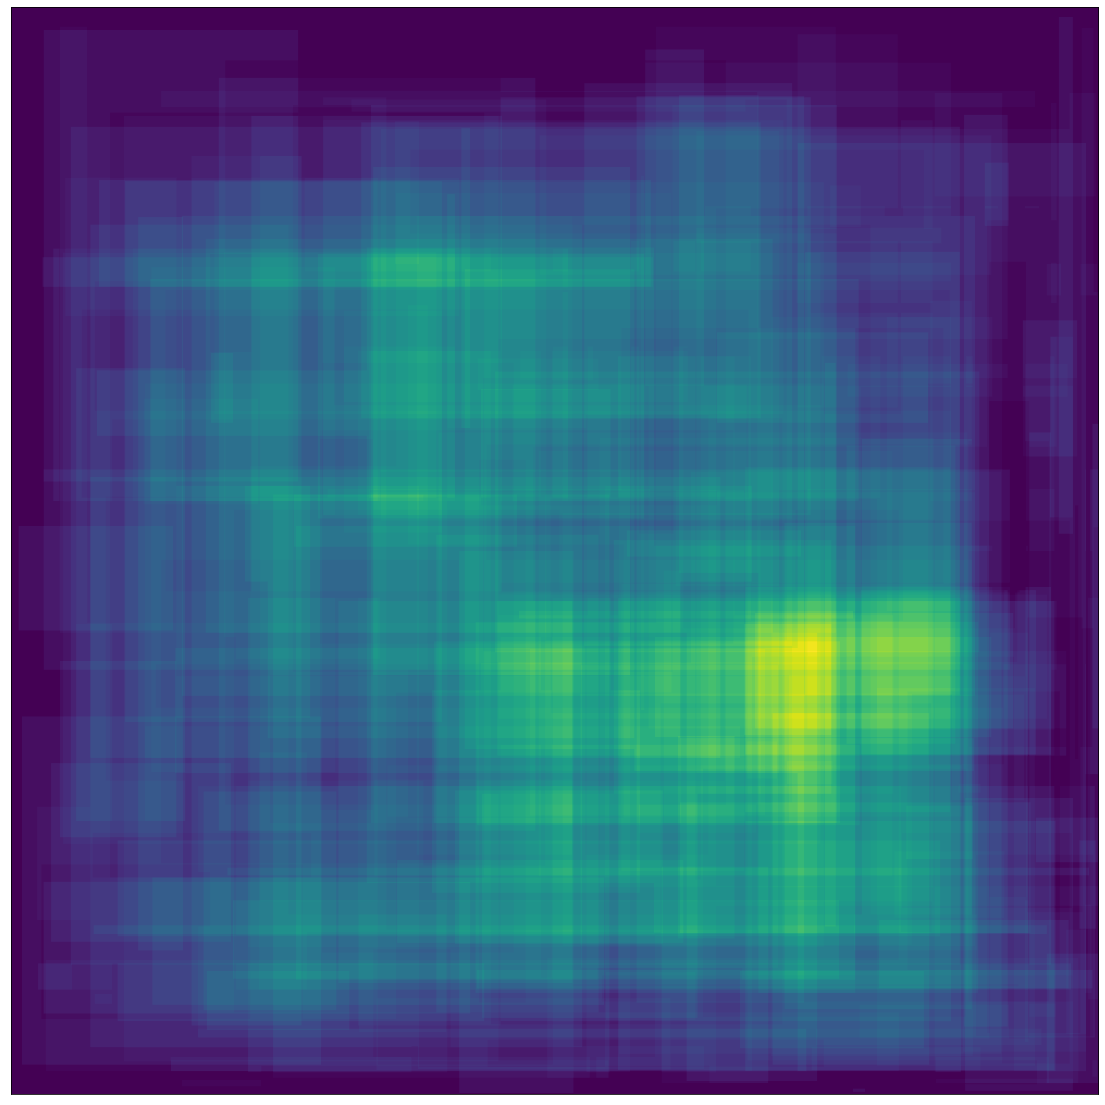

15343601


In [11]:
lights = light_array()
for i in instructions:
    lights.update(i)

plt.imshow(lights.board)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()    

print(np.sum(lights.board))